### Importing libraries

In [1]:
%reset -f

from functions import *

import pickle

from sklearn.preprocessing import scale, StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "dataset_rfm.csv"

### Importing dataset

In [3]:
dataset_rfm = load_data(input_path, input_filename)

___Loading raw dataset___
Initial shape : (95420, 4)


In [4]:
dataset_rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00


In [5]:
X = dataset_rfm.drop("customer_unique_id", axis=1).copy()
X

,Recency,Frequency,Monetary
0,115,1,129.90
1,118,1,18.90
2,541,1,69.00
3,325,1,25.99
4,292,1,180.00
...,...,...,...
95415,451,1,1570.00
95416,266,1,64.89
95417,572,1,89.90
95418,123,1,115.00


#### Scaling

In [6]:
X_norm = X.copy()
X_norm[X_norm.columns] = scale(X)
print(X_norm.shape)

X_norm

(95420, 3)


,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566
...,...,...,...
95415,1.360670,-0.161045,6.558813
95416,0.152779,-0.161045,-0.356298
95417,2.150696,-0.161045,-0.241392
95418,-0.780888,-0.161045,-0.126072


In [47]:
X_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,95420.0,2.014970e-17,1.000005,-1.583972,-0.813533,-0.127974,0.714286,3.169242
Frequency,95420.0,1.407069e-15,1.000005,-0.161045,-0.161045,-0.161045,-0.161045,70.850618
Monetary,95420.0,-5.528194e-17,1.000005,-0.650525,-0.434358,-0.241392,0.057705,61.094607


___Density distribution___


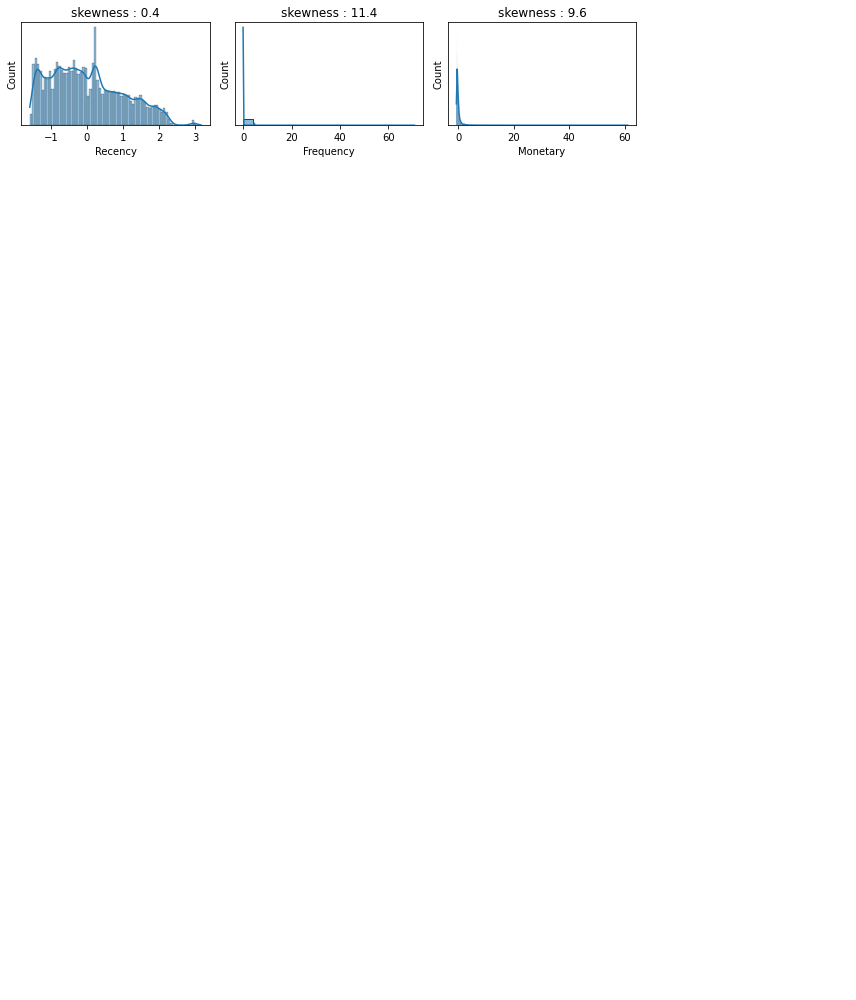

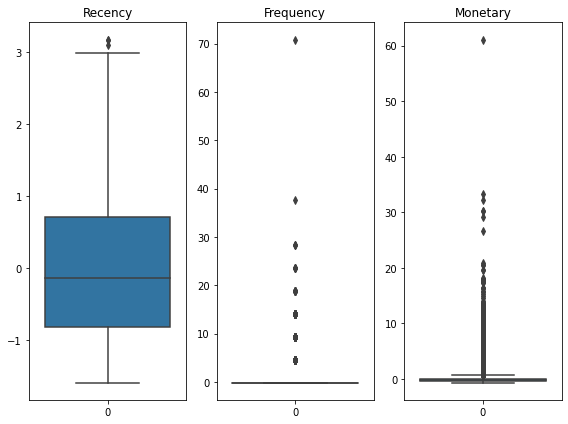

In [48]:
density_histplot(X_norm)
display_boxplot(X_norm)

#### Standardisation

In [49]:
X_std = X.copy()
scaler = StandardScaler()

X_std[X_std.columns] = scaler.fit_transform(X_std)
print(X_std.shape)

X_std

(95420, 3)


,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566
...,...,...,...
95415,1.360670,-0.161045,6.558813
95416,0.152779,-0.161045,-0.356298
95417,2.150696,-0.161045,-0.241392
95418,-0.780888,-0.161045,-0.126072


In [50]:
X_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,95420.0,2.014970e-17,1.000005,-1.583972,-0.813533,-0.127974,0.714286,3.169242
Frequency,95420.0,1.407069e-15,1.000005,-0.161045,-0.161045,-0.161045,-0.161045,70.850618
Monetary,95420.0,-5.528194e-17,1.000005,-0.650525,-0.434358,-0.241392,0.057705,61.094607


___Density distribution___


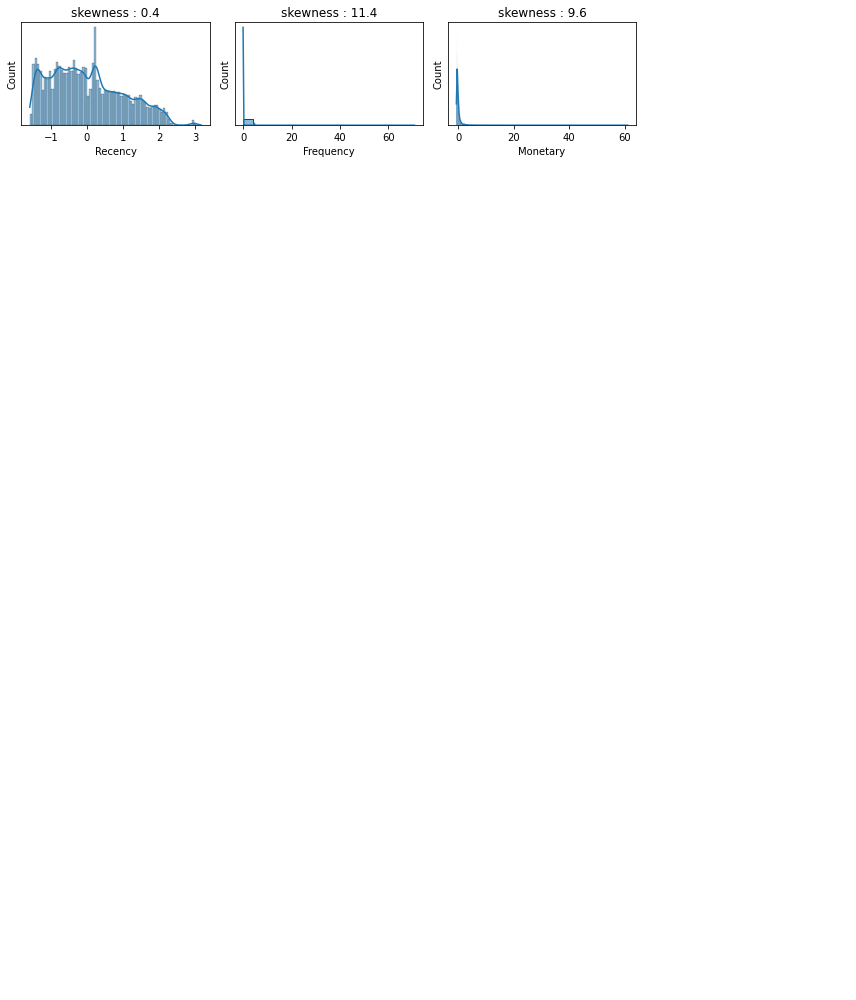

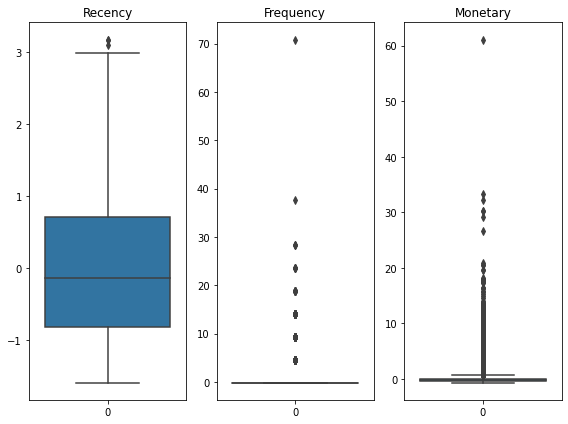

In [51]:
density_histplot(X_std)
display_boxplot(X_std)

##### Verifying that scale and std scaler are the same here

In [52]:
d = pd.concat([X_norm, X_std])
d

,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566
...,...,...,...
95415,1.360670,-0.161045,6.558813
95416,0.152779,-0.161045,-0.356298
95417,2.150696,-0.161045,-0.241392
95418,-0.780888,-0.161045,-0.126072


In [53]:
d.drop_duplicates(keep=False)

,Recency,Frequency,Monetary


##### ATTENTION : we use only 200 clients over 95000 for these tryouts

In [54]:
X_norm_sample = X_norm.copy()
X_norm_sample = X_norm_sample.sample(n=5000, random_state=0, ignore_index=True) # we need to reset the index to get a box plot

X_norm_sample

,Recency,Frequency,Monetary
0,0.224600,4.573066,0.090923
1,0.825281,-0.161045,-0.424755
2,0.100546,-0.161045,0.030139
3,-0.689480,-0.161045,-0.493626
4,-0.297731,-0.161045,-0.227149
...,...,...,...
4995,-0.630717,-0.161045,-0.310308
4996,-0.323848,-0.161045,-0.523535
4997,1.732831,-0.161045,-0.457330
4998,2.163755,-0.161045,0.218050


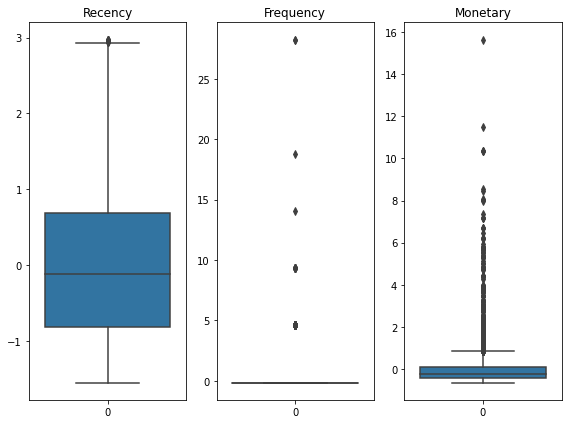

___Density distribution___


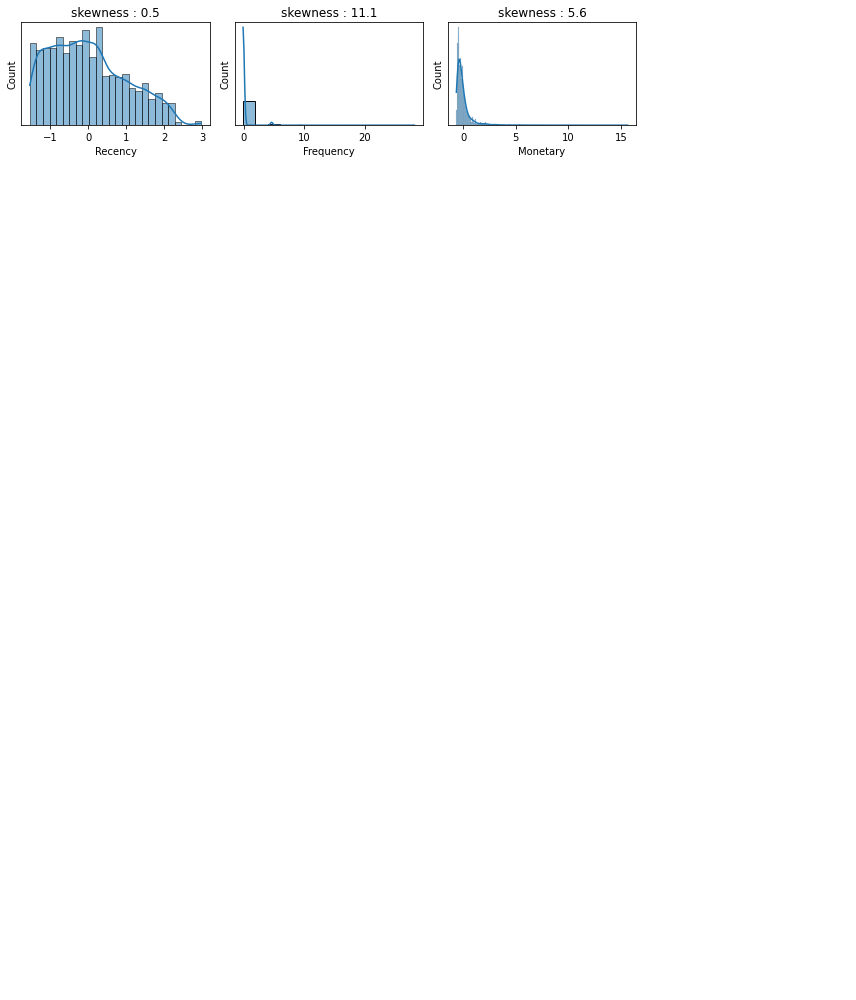

In [55]:
display_boxplot(X_norm_sample)
density_histplot(X_norm_sample)

### PCA : Principal Component Analysis

In [56]:
pca = PCA(n_components=2)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())

[0.36938074 0.70282884]


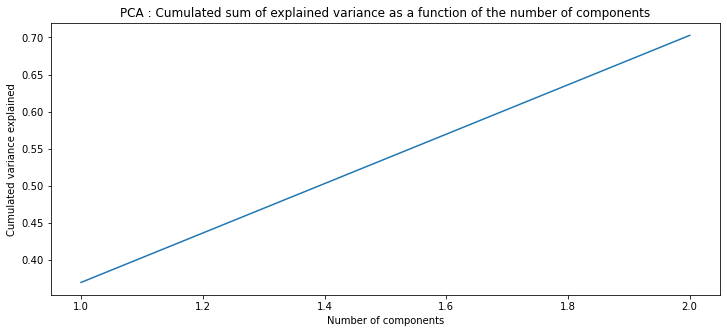

In [57]:
plt.figure(figsize=(12,5))
plt.title('PCA : Cumulated sum of explained variance as a function of the number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulated variance explained')

plt.plot(np.arange(start=1, stop=pca.n_components + 1),
         np.cumsum(pca.explained_variance_ratio_))

In [58]:
print("List of variance explained per component :", pca.explained_variance_ratio_)
print("Sum of the variance explained per component :", pca.explained_variance_ratio_.sum())

List of variance explained per component : [0.36938074 0.3334481 ]
Sum of the variance explained per component : 0.7028288419547448


In [59]:
# projeter X sur les composantes principales
X_pca = pca.transform(X_norm)
print("The PCA with 2 components explains", pca.explained_variance_ratio_.cumsum()[1], "% of the variance.")

The PCA with 2 components explains 0.7028288419547448 % of the variance.


In [60]:
X_pca

array([[-0.03654755, -0.82589883],
       [-0.39241169, -0.91196277],
       [-0.62191752,  1.83785248],
       ...,
       [-0.5839313 ,  2.05570828],
       [-0.0913012 , -0.7889165 ],
       [-0.61139795,  1.48787831]])

##### projection

(-0.7, 0.7)

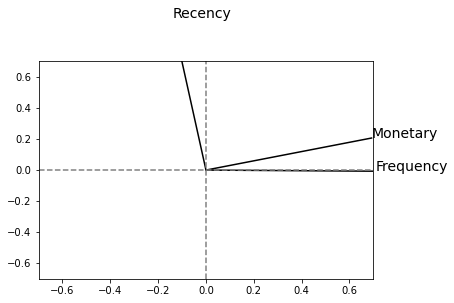

In [61]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X_norm.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

In [62]:
# sample :
pca_sample = PCA(n_components=2)
pca_sample.fit(X_norm_sample)
print(pca_sample.explained_variance_ratio_.cumsum())
X_pca_sample = pca_sample.transform(X_norm_sample)

[0.41106477 0.73319995]


### t-SNE

In [63]:
tsne = TSNE(n_components=2, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_norm_sample)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


### 1) Hierarchical clustering / HCA : Hierarchical Cluster Analysis

##### Getting the best number of clusters automatically

In [ ]:
hierarchical_cls = AgglomerativeClustering().fit(X_norm_sample)

Text(0.5, 1.0, 'Principal Components projection with t-SNE')

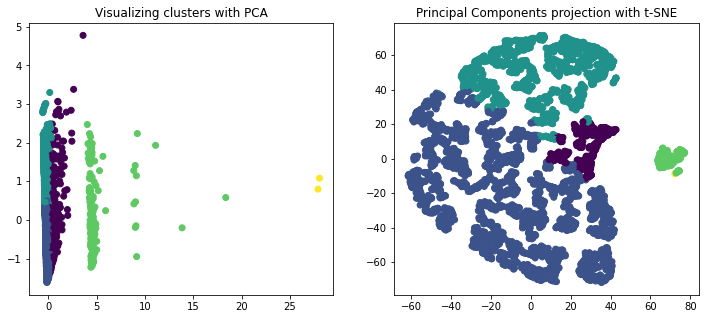

In [84]:
#hierarchical_cls.labels_

#hierarchical_cls.n_clusters

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_pca_sample[:, 0], y=X_pca_sample[:, 1], c=hierarchical_cls.labels_) # colorier en fct etiquette deu clusterning
plt.title("Visualizing clusters with PCA")

ax = fig.add_subplot(122) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_tsne[:,0], y=X_tsne[:,1], c=hierarchical_cls.labels_) # palette=sns.color_palette("hls", n_colors=num_clusters)
plt.title('Principal Components projection with t-SNE')

In [ ]:
silhouette_score(X_norm_sample, hierarchical_cls.labels_)

##### Choosing the number of clusters

In [ ]:
hierarchical_cls = AgglomerativeClustering(n_clusters=5).fit(X_norm_sample)

### 2) DBSCAN

In [ ]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
>>> clustering.labels_
array([ 0,  0,  0,  1,  1, -1])
>>> clustering
DBSCAN(eps=3, min_samples=2)

### 3) K-Means Clustering

#### 1) Using sample X_norm_sample

##### First tryout

In [64]:
kmeans_cluster = KMeans(n_clusters=3, verbose=0, random_state=0)
kmeans_cluster.fit(X_norm_sample)

# kmeans_cluster.labels_

KMeans(n_clusters=3, random_state=0)

In [65]:
kmeans_cluster.inertia_

7400.869654525691

In [66]:
silh = silhouette_score(X_norm_sample, kmeans_cluster.labels_)
silh

0.4534586905355201

##### Visualizing

Text(0.5, 1.0, 'Principal Components projection with t-SNE')

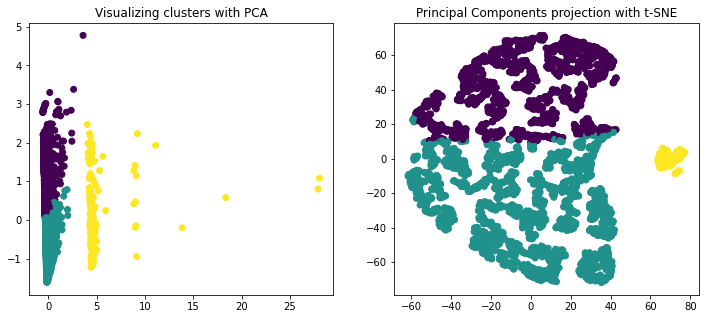

In [67]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_pca_sample[:, 0], y=X_pca_sample[:, 1], c=kmeans_cluster.labels_) # colorier en fct etiquette deu clusterning
plt.title("Visualizing clusters with PCA")

ax = fig.add_subplot(122) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_tsne[:,0], y=X_tsne[:,1], c=kmeans_cluster.labels_) # palette=sns.color_palette("hls", n_colors=num_clusters)
plt.title('Principal Components projection with t-SNE')


<AxesSubplot:>

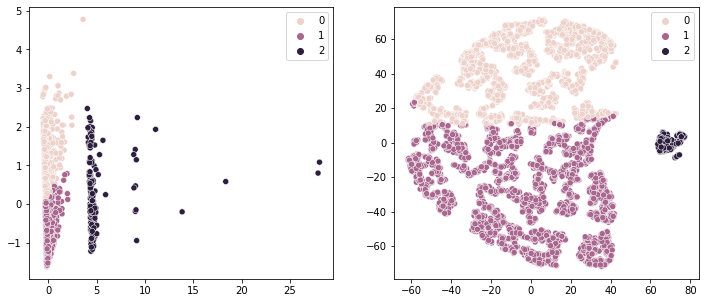

In [68]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x=X_pca_sample[:, 0], y=X_pca_sample[:, 1],
    hue=kmeans_cluster.labels_,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=kmeans_cluster.labels_,
    ax=ax2
)

#### Searching the best number of clusters K

In [69]:
inertia = {}
dict_kmeans = {}

for num_clusters in range(1, 25):
    print("\n\nTrying K =", num_clusters, end='\n')
    kmeans_cluster = KMeans(n_clusters=num_clusters,
                    verbose=1,
                    random_state=0).fit(X_norm_sample)
    inertia[num_clusters] = kmeans_cluster.inertia_
    dict_kmeans[num_clusters] = kmeans_cluster



Trying K = 1
Initialization complete
Iteration 0, inertia 41731.49539354346.
Iteration 1, inertia 15446.581972263813.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 19300.063204958216.
Iteration 1, inertia 15446.581972263813.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 26107.779528522842.
Iteration 1, inertia 15446.581972263813.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 17975.491952934994.
Iteration 1, inertia 15446.581972263813.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 16169.938324603208.
Iteration 1, inertia 15446.581972263813.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 16869.435789765837.
Iteration 1, inertia 15446.581972263813.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 16012.561188368047.
Iteration

In [70]:
inertia

{1: 15446.581972263813,
 2: 10768.363900110378,
 3: 7400.869654525691,
 4: 5095.659940329821,
 5: 3890.042908611846,
 6: 3072.937906034521,
 7: 2453.4349271199762,
 8: 2174.780157184291,
 9: 1962.8057629320558,
 10: 1721.0489296124993,
 11: 1581.9656164721564,
 12: 1453.9275696117272,
 13: 1334.2568713465514,
 14: 1232.5772328585913,
 15: 1164.5247191507667,
 16: 1071.4476434540952,
 17: 1010.2822776327938,
 18: 942.9665532174686,
 19: 869.2419513424711,
 20: 819.0724833456989,
 21: 765.3433375415233,
 22: 733.8438305737003,
 23: 707.2020725328817,
 24: 655.9342444022533}

K-Means minimises the inertia / intra-custer Variance.


<AxesSubplot:title={'center':'K-Means: The sum of inertia as a function of the number of clusters.'}>

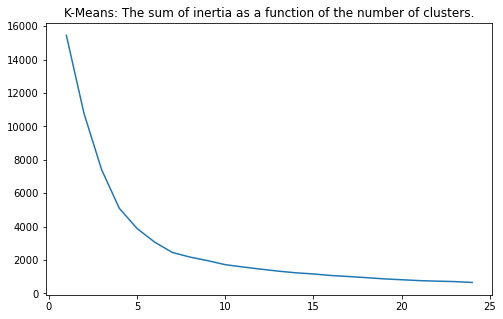

In [71]:
print("K-Means minimises the inertia / intra-custer Variance.")

plt.figure(figsize=(8, 5))
plt.title('K-Means: The sum of inertia as a function of the number of clusters.')
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))

We want the silhouette score to be close to 1.


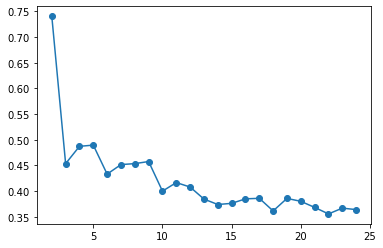

In [72]:
silhouettes = []
for num_clusters in range(2, 25):
    cls = KMeans(n_clusters=num_clusters, random_state=0) # #init='random', n_init=1)
    cls.fit(X_norm_sample)
    silh = silhouette_score(X_norm_sample, cls.labels_)
    silhouettes.append(silh)

print("We want the silhouette score to be close to 1.")
plt.plot(range(2, 25), silhouettes, marker='o')

#### 2) Real dataset X_norm

In [73]:
inertia = {}
dict_kmeans = {}

for num_clusters in range(1, 25):
    print("\n\nTrying K =", num_clusters, end='\n')
    kmeans_cluster = KMeans(n_clusters=num_clusters,
                            verbose=1,
                            random_state=0).fit(X_norm)
    inertia[num_clusters] = kmeans_cluster.inertia_
    dict_kmeans[num_clusters] = kmeans_cluster



Trying K = 1
Initialization complete
Iteration 0, inertia 507411.74056458916.
Iteration 1, inertia 286260.0000000008.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 731741.1721102367.
Iteration 1, inertia 286260.0000000008.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 315118.60463744734.
Iteration 1, inertia 286260.0000000008.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 307473.9854210085.
Iteration 1, inertia 286260.0000000008.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 374153.9187333881.
Iteration 1, inertia 286260.0000000008.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2333349.710155985.
Iteration 1, inertia 286260.0000000008.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 319007.6099156335.
Iteration 1, inerti

K-Means minimises the inertia / intra-custer Variance.


<AxesSubplot:title={'center':'K-Means: The sum of inertia as a function of the number of clusters.'}>

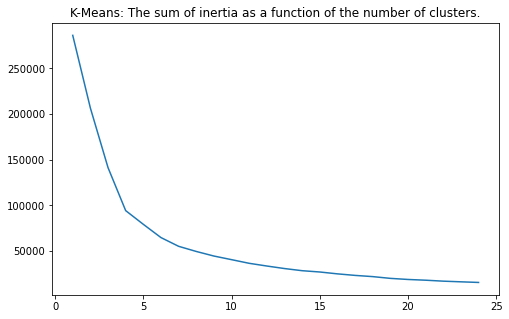

In [74]:
print("K-Means minimises the inertia / intra-custer Variance.")

plt.figure(figsize=(8, 5))
plt.title('K-Means: The sum of inertia as a function of the number of clusters.')
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))

##### K = 5 chosen

In [75]:
best_kmeans = KMeans(n_clusters=15,
                            verbose=1,
                            random_state=0).fit(X_norm)


Initialization complete
Iteration 0, inertia 36544.32603649518.
Iteration 1, inertia 29131.055189808216.
Iteration 2, inertia 28504.64923538523.
Iteration 3, inertia 28213.394774500743.
Iteration 4, inertia 28042.106663935763.
Iteration 5, inertia 27923.44713042774.
Iteration 6, inertia 27856.607448440027.
Iteration 7, inertia 27817.893254796712.
Iteration 8, inertia 27788.44621255654.
Iteration 9, inertia 27769.441512448026.
Iteration 10, inertia 27755.01760720528.
Iteration 11, inertia 27743.446643785006.
Iteration 12, inertia 27734.32744058261.
Iteration 13, inertia 27723.997294717246.
Iteration 14, inertia 27714.26412761115.
Iteration 15, inertia 27707.75322292226.
Iteration 16, inertia 27705.75279197915.
Iteration 17, inertia 27703.840500475064.
Iteration 18, inertia 27702.165893217963.
Iteration 19, inertia 27701.05985214068.
Iteration 20, inertia 27700.687959661413.
Converged at iteration 20: center shift 1.8359900431890574e-05 within tolerance 0.00010000000000001526.
Initializa

In [76]:
pca.explained_variance_ratio_

array([0.36938074, 0.3334481 ])

Text(0.5, 1.0, 'Visualizing clusters with PCA')

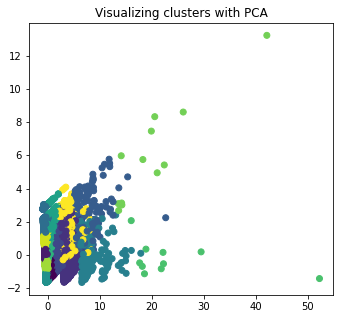

In [77]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=best_kmeans.labels_) # colorier en fct etiquette deu clusterning
plt.title("Visualizing clusters with PCA")

#ax = fig.add_subplot(122) # 1 en ordonnée / 2 en abcs / celle là la premiere
#ax.scatter(x=X_tsne[:,0], y=X_tsne[:,1], c=kmeans_cluster.labels_) # palette=sns.color_palette("hls", n_colors=num_clusters)
#plt.title('Principal Components projection with t-SNE')


##### Analysis K =

In [78]:
best_kmeans_dataset = dataset_rfm.copy()
display(best_kmeans_dataset)

best_kmeans_dataset['Customer_cluster'] = best_kmeans.labels_
display(best_kmeans_dataset)

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00


,customer_unique_id,Recency,Frequency,Monetary,Customer_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,12
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,12
2,0000f46a3911fa3c0805444483337064,541,1,69.00,5
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,9
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,14
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,1
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,5
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,12


In [79]:
data = best_kmeans_dataset[["Customer_cluster"]].value_counts()
data

Customer_cluster
12                  19863
1                   17458
7                   15922
13                  13275
5                    9968
9                    5685
0                    5352
2                    2641
3                    2106
8                    1919
14                    751
4                     229
6                     229
11                     12
10                     10
dtype: int64

0.4962690326790877

### Segmentation : RFM Score (Giving a rank to each customer based on RFM using K-Means)

##### Clustering RFM variables using K-Means

In [86]:
kmeans_cluster = KMeans(n_clusters=4, random_state=0)

In [87]:
rfm_columns = ['Recency','Frequency','Monetary']

In [88]:
rfm_clustering = apply_kmeans_per_column(dataset_rfm, rfm_columns, kmeans_cluster, n_clusters=4)

Before


Recency                                                     \
                   count        mean        std    min    25%    50%    75%   
Recency_cluster                                                               
0                27735.0  188.320606  35.263820  128.0  159.0  188.0  219.0   
1                16723.0  490.362973  58.790423  406.0  444.0  481.0  532.0   
2                25022.0  319.903285  44.061560  255.0  281.0  313.0  357.0   
3                25940.0   66.341403  36.097045    0.0   33.0   66.0  100.0   

                        
                   max  
Recency_cluster         
0                254.0  
1                728.0  
2                405.0  
3                127.0

After


Recency                                                     \
                   count        mean        std    min    25%    50%    75%   
Recency_cluster                                                               
0                16723.0  490.362973  58.790423  406.0  444.0  481.0  532.0   
1                25022.0  319.903285  44.061560  255.0  281.0  313.0  357.0   
2                27735.0  188.320606  35.263820  128.0  159.0  188.0  219.0   
3                25940.0   66.341403  36.097045    0.0   33.0   66.0  100.0   

                        
                   max  
Recency_cluster         
0                728.0  
1                405.0  
2                254.0  
3                127.0

Before


Frequency                                              
                      count      mean       std  min  25%  50%  75%   max
Frequency_cluster                                                        
0                   92507.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0
1                    2673.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0
2                     221.0  3.131222  0.338409  3.0  3.0  3.0  3.0   4.0
3                      19.0  6.368421  2.564946  5.0  5.0  6.0  6.5  16.0

After


Frequency                                              
                      count      mean       std  min  25%  50%  75%   max
Frequency_cluster                                                        
0                   92507.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0
1                    2673.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0
2                     221.0  3.131222  0.338409  3.0  3.0  3.0  3.0   4.0
3                      19.0  6.368421  2.564946  5.0  5.0  6.0  6.5  16.0

Before


Monetary                                                      \
                    count         mean          std      min      25%     50%   
Monetary_cluster                                                                
0                 16892.0   275.783227    91.733765   175.79   199.90   249.0   
1                  2885.0   825.691875   241.741323   550.99   629.00   750.0   
2                 75253.0    75.527705    43.316084     0.85    39.89    69.0   
3                   390.0  2223.861590  1007.485998  1534.90  1699.99  1980.0   

                                    
                     75%       max  
Monetary_cluster                    
0                  329.0    550.90  
1                  960.0   1520.88  
2                  109.0    175.66  
3                 2300.0  13440.00

After


Monetary                                                      \
                    count         mean          std      min      25%     50%   
Monetary_cluster                                                                
0                 75253.0    75.527705    43.316084     0.85    39.89    69.0   
1                 16892.0   275.783227    91.733765   175.79   199.90   249.0   
2                  2885.0   825.691875   241.741323   550.99   629.00   750.0   
3                   390.0  2223.861590  1007.485998  1534.90  1699.99  1980.0   

                                    
                     75%       max  
Monetary_cluster                    
0                  109.0    175.66  
1                  329.0    550.90  
2                  960.0   1520.88  
3                 2300.0  13440.00

In [89]:
display(rfm_clustering)

,customer_unique_id,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,3,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,3,0,0
2,0000f46a3911fa3c0805444483337064,541,1,69.00,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,0,0
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,0,1
...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,0,0,3
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,1,0,0
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,0,0,0
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,3,0,0


##### Segmentation as a function of RFM criteria : getting ideas

In [90]:
#rfm_clustering["RFM_score"] = rfm_clustering["Recency_cluster"] * 100 + rfm_clustering["Frequency_cluster"] * 10 + rfm_clustering["Monetary_cluster"]
rfm_clustering['RFM_score'] = rfm_clustering.Recency_cluster.astype(str) + rfm_clustering.Frequency_cluster.astype(str) + rfm_clustering.Monetary_cluster.astype(str)

display(rfm_clustering)

,customer_unique_id,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,3,0,0,300
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,3,0,0,300
2,0000f46a3911fa3c0805444483337064,541,1,69.00,0,0,0,000
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,0,0,100
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,0,1,101
...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,0,0,3,003
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,1,0,0,100
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,0,0,0,000
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,3,0,0,300


In [91]:
rfm_clustering[["RFM_score"]].value_counts()

RFM_score
200          21546
300          20055
100          19302
000          12962
201           4516
301           4194
101           4100
001           2805
102            779
202            706
302            689
002            486
210            390
310            383
211            362
110            356
311            356
111            299
010            199
011            137
303            120
203             84
103             83
003             80
212             54
312             50
321             47
112             45
221             30
121             28
012             26
220             22
322             16
320             14
120             12
021             12
020             11
222             11
122             10
113              7
332              6
313              5
232              5
231              5
323              3
022              2
213              2
223              2
013              2
030              1
123              1
331              1
33

In [92]:
print("We have {} combinaisons possible here.".format(rfm_clustering["RFM_score"].nunique()))

n_clusters = 4
rfm_variables = 3
print("In theory, we would have {} combinaisons.".format(n_clusters ** rfm_variables))

We have 53 combinaisons possible here.
In theory, we would have 64 combinaisons.


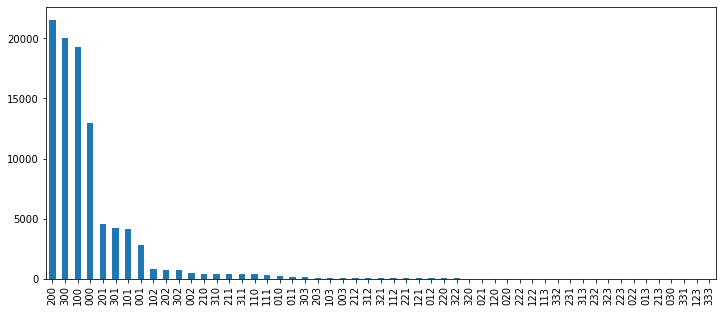

In [93]:
data = rfm_clustering['RFM_score']

fig = plt.figure(figsize=(12, 5))
data.value_counts().plot(kind='bar');

##### Specifying each cluster with describe

In [94]:
description_clustering = rfm_clustering.copy()

for i, rfm_variable in enumerate(["Recency", "Frequency", "Monetary"]):
    for j, rfm_cluster in enumerate(["Recency_cluster", "Frequency_cluster", "Monetary_cluster"]):
        if i == j:
            display(description_clustering[[rfm_cluster, rfm_variable]].groupby(rfm_cluster).describe())

Recency                                                     \
                   count        mean        std    min    25%    50%    75%   
Recency_cluster                                                               
0                16723.0  490.362973  58.790423  406.0  444.0  481.0  532.0   
1                25022.0  319.903285  44.061560  255.0  281.0  313.0  357.0   
2                27735.0  188.320606  35.263820  128.0  159.0  188.0  219.0   
3                25940.0   66.341403  36.097045    0.0   33.0   66.0  100.0   

                        
                   max  
Recency_cluster         
0                728.0  
1                405.0  
2                254.0  
3                127.0

Frequency                                              
                      count      mean       std  min  25%  50%  75%   max
Frequency_cluster                                                        
0                   92507.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0
1                    2673.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0
2                     221.0  3.131222  0.338409  3.0  3.0  3.0  3.0   4.0
3                      19.0  6.368421  2.564946  5.0  5.0  6.0  6.5  16.0

Monetary                                                      \
                    count         mean          std      min      25%     50%   
Monetary_cluster                                                                
0                 75253.0    75.527705    43.316084     0.85    39.89    69.0   
1                 16892.0   275.783227    91.733765   175.79   199.90   249.0   
2                  2885.0   825.691875   241.741323   550.99   629.00   750.0   
3                   390.0  2223.861590  1007.485998  1534.90  1699.99  1980.0   

                                    
                     75%       max  
Monetary_cluster                    
0                  109.0    175.66  
1                  329.0    550.90  
2                  960.0   1520.88  
3                 2300.0  13440.00

In [95]:
recency_dict = {
    0: "two_years_ago_",
    1: "last_year_",
    2: "4-6_months_ago_",
    3: "0_4_months_ago_"
}

frequency_dict = {
    0: "1_order_",
    1: "2_orders_",
    2: "3_to_4_orders_",
    3: "more_than_5_orders_"
}

# 1 euro = 0.2 BRL
monetary_dict = {
    0: "up_to_176_BRL",
    1: "up_to_551_BRL",
    2: "up_to_1521_BRL",
    3: "up_to_13440_BRL"
}

##### Segmentation

In [96]:
rfm_clustering['Classification'] = 'none'

#filter_ = (rfm_clustering['Classification'] == 'none')

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 2) & # bought recently
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0) # bought once
                   & (rfm_clustering['Classification'] == 'none'), # so that we won't over write classification
                   'Classification'] = recency_dict[2]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3) & # bought recently
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)
                    & (rfm_clustering['Classification'] == 'none'), # bought once
                   'Classification'] = recency_dict[3]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 1) &
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)  # bought once
                   & (rfm_clustering['Classification'] == 'none'),
                   'Classification'] = recency_dict[1]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0) &
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)  # bought once
                   & (rfm_clustering['Classification'] == 'none') ,
                   'Classification'] = recency_dict[0]  + frequency_dict[0] + monetary_dict[0]


#Lowest-spending only_bought_once customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] <= 1) & # bought recently or not sooo long ago
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought once
                   (rfm_clustering['Monetary_cluster'] <= 1)  # bought cheap stuff
                   & (rfm_clustering['Classification'] == 'none'),
                   'Classification'] = recency_dict[1]  + frequency_dict[0] + monetary_dict[1]


In [97]:
#Best Customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3)
                   & (rfm_clustering['Frequency_cluster'] == 3)
              & (rfm_clustering['Monetary_cluster'] == 3)#, #
                & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'top_customer'

#High-spending New Customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3) &
              (rfm_clustering['Frequency_cluster'] == 0) &
              (rfm_clustering['Monetary_cluster'] == 3)#, #
                  & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'high_spending_new_customer'

#Lowest-spending active loyal customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] != 0) &
                   (rfm_clustering['Frequency_cluster'] > 0) &
              (rfm_clustering['Monetary_cluster'] < 2)#, #
                  & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'low_spending_loyal_customer'

#Churned Best Customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0)
              & (rfm_clustering['Frequency_cluster'] > 1)
                   & (rfm_clustering['Monetary_cluster'] == 3) #, #
                   & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'churned_top_customer'

In [98]:
data = rfm_clustering['Classification']

data.value_counts()

4-6_months_ago_1_order_up_to_176_BRL    21546
0_4_months_ago_1_order_up_to_176_BRL    20055
last_year_1_order_up_to_176_BRL         19302
two_years_ago_1_order_up_to_176_BRL     12962
none                                    12224
last_year_1_order_up_to_551_BRL          6905
low_spending_loyal_customer              2305
high_spending_new_customer                120
top_customer                                1
Name: Classification, dtype: int64

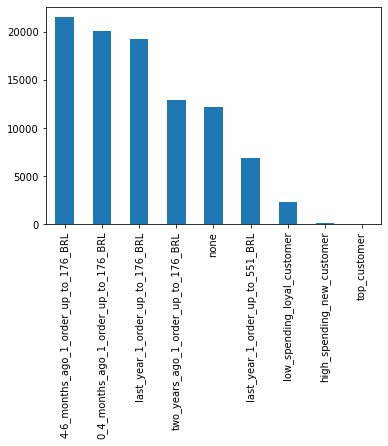

In [99]:
data.value_counts().plot(kind='bar');

In [100]:
print("To get a segmentation idea")
rfm_clustering[rfm_clustering['Classification'] == 'none']

To get a segmentation idea


,customer_unique_id,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,RFM_score,Classification
7,00053a61a98854899e70ed204dd4bafe,186,1,382.0,2,0,1,201,none
22,000fbf0473c10fc1ab6f8d2d286ce20c,38,1,285.8,3,0,1,301,none
53,0025795df7a7d077c4c90162fa820085,40,1,177.9,3,0,1,301,none
59,002aba8c1af80acacef6e011f9f23262,187,1,199.9,2,0,1,201,none
72,003162bf0351f47a1a247992b8b9b42d,50,1,514.9,3,0,1,301,none
...,...,...,...,...,...,...,...,...,...
95392,ffebb6424578e7bb153322da9d65634f,594,1,629.0,0,0,2,002,none
95407,fff5eb4918b2bf4b2da476788d42051c,62,1,1050.0,3,0,2,302,none
95409,fff7219c86179ca6441b8f37823ba3d3,249,1,245.8,2,0,1,201,none
95414,fffcc512b7dfecaffd80f13614af1d16,145,1,688.0,2,0,2,202,none


#### Customer Personas

https://ironfocus.com/blog/rfm-analysis-how-to-increase-your-sales/

In [101]:
personas = {
    "Brand Champion": {"R": 3, "F": 3, "M": 3},
    "Loyal Customers": {"R": 3, "F": 3, "M": 2},

    "Possibly Alienated_1": {"R": 0, "F": 2, "M": None},
    "Possibly Alienated_2": {"R": 0, "F": 3, "M": None},

    "Possibly Alienated_3": {"R": 1, "F": 2, "M": None},
    "Possibly Alienated_4": {"R": 1, "F": 3, "M": None},

    "New Customers": {"R": 3, "F": 0, "M": None},
    "One-off big spenders": {"R": 0, "F": 0, "M": 3},
    "Expired leads": {"R": 0, "F": 0, "M": 0},
}

In [102]:
rfm_clustering['Persona'] = 'none'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3)
                   & (rfm_clustering['Frequency_cluster'] == 3)
                   & (rfm_clustering['Monetary_cluster'] == 3)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Brand Champion'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3)
                   & (rfm_clustering['Frequency_cluster'] == 3)
                   & (rfm_clustering['Monetary_cluster'] == 2)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Loyal Customers'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] <= 1) #| (rfm_clustering['Recency_cluster'] == 1)) # 0 or 1
                   & ((rfm_clustering['Frequency_cluster'] == 2) | (rfm_clustering['Frequency_cluster'] == 3))
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Possibly Alienated'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3) #| (rfm_clustering['Recency_cluster'] == 1)) # 0 or 1
                   & (rfm_clustering['Frequency_cluster'] == 0)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'New Customers'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0)
                   & (rfm_clustering['Frequency_cluster'] == 0)
                   & (rfm_clustering['Monetary_cluster'] == 3)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'One-off big spenders'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0)
                   & (rfm_clustering['Frequency_cluster'] == 0)
                   & (rfm_clustering['Monetary_cluster'] == 0)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Expired leads'

In [103]:
data = rfm_clustering['Persona']

data.value_counts()

none                    57236
New Customers           25058
Expired leads           12962
One-off big spenders       80
Possibly Alienated         77
Loyal Customers             6
Brand Champion              1
Name: Persona, dtype: int64

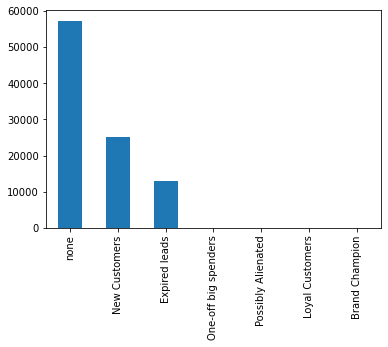

In [104]:
data.value_counts().plot(kind='bar');

In [105]:
# End of simulation time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 327.873342 sec
computing time : 00:05:27
